## Import Libraries

In [ ]:
!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.2/491.2 kB 11.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 15.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver d

In [ ]:
!pip install evaluate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 6.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset, DatasetDict
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from transformers import DataCollatorWithPadding
import pandas as pd
from google.colab import files
import io
from collections import Counter
from transformers import Trainer

## Import Dataset, Then split and convert to DataDict

In [ ]:
# Step 1: Upload a file from your local machine
uploaded = files.upload()

# Step 2: Read the uploaded file into a pandas DataFrame
# Assuming the uploaded file is a CSV
for filename in uploaded.keys():
    print(f"Reading file: {filename}")
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    break  # Only read the first file uploaded

# Step 3: Display the first few rows of the DataFrame
df.head()

Saving Combined_Real_vs_Fake_Reviews_Dataset__20_000_Samples_.csv to Combined_Real_vs_Fake_Reviews_Dataset__20_000_Samples_.csv
Reading file: Combined_Real_vs_Fake_Reviews_Dataset__20_000_Samples_.csv


text  label
0  I can't stop recommending this to everyone I k...      0
1  I can't stop recommending this to everyone I k...      0
2  Absolutely amazing! I would buy this again and...      0
3  Exceeded my expectations. Perfect in every way...      0
4  Unbelievable performance, can't live without i...      0

In [ ]:
df['label'].value_counts()

label
0    18000
1     2000
Name: count, dtype: int64

In [ ]:
df.rename(columns={'label': 'labels'}, inplace=True)
df.head()

text  labels
0  I can't stop recommending this to everyone I k...       0
1  I can't stop recommending this to everyone I k...       0
2  Absolutely amazing! I would buy this again and...       0
3  Exceeded my expectations. Perfect in every way...       0
4  Unbelievable performance, can't live without i...       0

In [ ]:
import numpy as np
train, validate, test = np.split(df.sample(frac=1, random_state=42),[int(.6*len(df)),int(.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
train = train.reset_index()[['text','labels']]
validate = validate.reset_index()[['text','labels']]
test = test.reset_index()[['text','labels']]

In [ ]:
tds = Dataset.from_pandas(train)
vds = Dataset.from_pandas(validate)
teds = Dataset.from_pandas(test)

In [ ]:
dataset = DatasetDict()
dataset["train"] = tds
dataset["validate"] = vds
dataset["test"] = teds

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 12000
    })
    validate: Dataset({
        features: ['text', 'labels'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 4000
    })
})

In [ ]:
# Check the number of records after over sampling
label_counts = Counter(dataset["train"]["labels"])
print(sorted(label_counts.items()))

[(0, 10806), (1, 1194)]


## Tokenizer

In [ ]:
# ‚úÖ Tokenization
model_ckpt ="bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(example):
    return tokenizer(example["text"], truncation=True)

tokenized = dataset.map(tokenize, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
num_labels = len(set(dataset['train']['labels']))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [ ]:
num_labels

2

## Focal Loss

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean() if self.reduction == 'mean' else focal_loss.sum()

class CustomModel(nn.Module):
    def __init__(self, model_name, num_labels):
        super(CustomModel, self).__init__()
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
        self.loss_fn = FocalLoss()

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = None
        if labels is not None:
            loss = self.loss_fn(logits, labels)
        return {'loss': loss, 'logits': logits}

model = CustomModel('bert-base-uncased', num_labels=num_labels)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Compute Metrics

In [ ]:
import evaluate
import numpy as np

# Load required metrics
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

# Define compute_metrics using evaluate
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Compute individual metrics
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    macro_precision = precision_metric.compute(predictions=predictions, references=labels, average="macro")
    macro_recall = recall_metric.compute(predictions=predictions, references=labels, average="macro")
    macro_f1 = f1_metric.compute(predictions=predictions, references=labels, average="macro")

    weighted_precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    weighted_recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    weighted_f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")

    # Combine all into one dictionary
    return {
        "accuracy": accuracy["accuracy"],
        "macro_precision": macro_precision["precision"],
        "macro_recall": macro_recall["recall"],
        "macro_f1": macro_f1["f1"],
        "weighted_precision": weighted_precision["precision"],
        "weighted_recall": weighted_recall["recall"],
        "weighted_f1": weighted_f1["f1"]
    }

## Training Arguments

In [ ]:
args = TrainingArguments(
    output_dir="results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none",
)


In [ ]:
tokenized['train']

Dataset({
    features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 12000
})

In [ ]:

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized['train'],
    eval_dataset=tokenized['validate'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)



<ipython-input-19-f84b55245bdb>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## Train Model

In [ ]:
trainer.train()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=2250, training_loss=0.07491207207573784, metrics={'train_runtime': 306.6573, 'train_samples_per_second': 117.395, 'train_steps_per_second': 7.337, 'total_flos': 0.0, 'train_loss': 0.07491207207573784, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.07260168343782425,
 'eval_accuracy': 0.9025,
 'eval_macro_precision': 0.45125,
 'eval_macro_recall': 0.5,
 'eval_macro_f1': 0.4743758212877792,
 'eval_weighted_precision': 0.81450625,
 'eval_weighted_recall': 0.9025,
 'eval_weighted_f1': 0.8562483574244415,
 'eval_runtime': 6.9869,
 'eval_samples_per_second': 572.499,
 'eval_steps_per_second': 35.781,
 'epoch': 3.0}

In [ ]:
trainer.state.best_model_checkpoint

'results/checkpoint-750'

In [ ]:
test_metrics = trainer.evaluate(eval_dataset= tokenized['test'])
print(test_metrics)

{'eval_loss': 0.07502053678035736, 'eval_accuracy': 0.896, 'eval_macro_precision': 0.448, 'eval_macro_recall': 0.5, 'eval_macro_f1': 0.47257383966244726, 'eval_weighted_precision': 0.8028160000000001, 'eval_weighted_recall': 0.896, 'eval_weighted_f1': 0.8468523206751055, 'eval_runtime': 7.1197, 'eval_samples_per_second': 561.818, 'eval_steps_per_second': 35.114, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
trainer.predict(tokenized['test'])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PredictionOutput(predictions=array([[ 0.38094938, -0.4519148 ],
       [ 0.8589934 , -0.693278  ],
       [ 0.29594257, -0.47813872],
       ...,
       [ 0.45000264, -0.471986  ],
       [ 0.39874926, -0.39261353],
       [-0.22350119, -0.28977537]], dtype=float32), label_ids=array([0, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.07502053678035736, 'test_accuracy': 0.896, 'test_macro_precision': 0.448, 'test_macro_recall': 0.5, 'test_macro_f1': 0.47257383966244726, 'test_weighted_precision': 0.8028160000000001, 'test_weighted_recall': 0.896, 'test_weighted_f1': 0.8468523206751055, 'test_runtime': 7.3242, 'test_samples_per_second': 546.137, 'test_steps_per_second': 34.134})

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


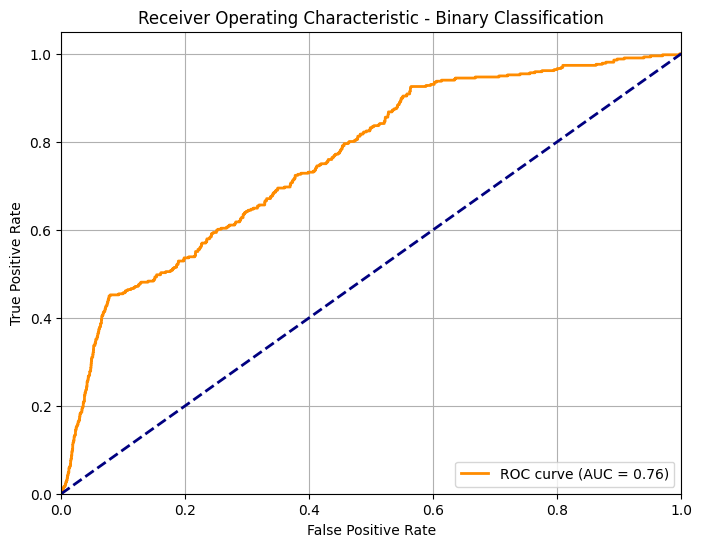

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions = trainer.predict(tokenized["test"])

logits = predictions.predictions
label_ids = predictions.label_ids

# Step 1: Apply softmax to convert logits to probabilities
from scipy.special import softmax
probs = softmax(logits, axis=1)
positive_class_probs = probs[:, 1]  # probability of class 1

# Step 2: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(predictions.label_ids, positive_class_probs)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
 predictions.predictions

array([[ 0.38094938, -0.4519148 ],
       [ 0.8589934 , -0.693278  ],
       [ 0.29594257, -0.47813872],
       ...,
       [ 0.45000264, -0.471986  ],
       [ 0.39874926, -0.39261353],
       [-0.22350119, -0.28977537]], dtype=float32)

In [ ]:
predictions.label_ids

array([0, 0, 0, ..., 0, 0, 0])

## Confusion matrix

In [ ]:
from collections import Counter

# Convert each label tensor to a plain integer
labels = [int(label) for label in tokenized['test']["labels"]]

# Now count them
label_counts = Counter(labels)

# Print the results nicely
print(label_counts)

Counter({0: 3584, 1: 416})


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


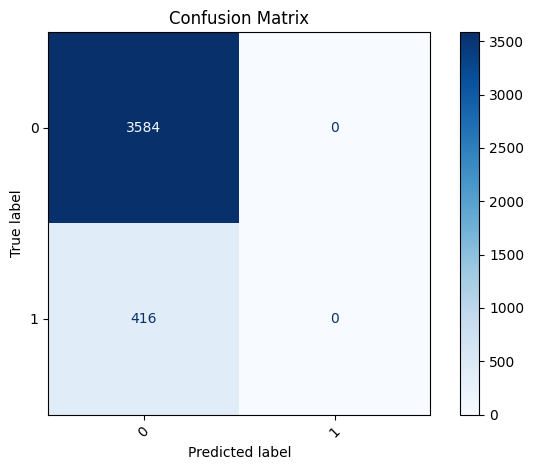


=== Evaluation Metrics ===
Accuracy:- Out of all the predictions we made, How many were True.
TP+TN / TP+TN+FP+FN
Accuracy:  0.8960
-----------------------------------------------
Precision:- Out of all the positive predictions we made, How many were True?
TP / TP+FP
Precision: 0.0000
-----------------------------------------------
Recall:- Out of all the data points that should be predicted as True, How many we correctly predict as True?
TP / TP+FN
Recall:    0.0000
-----------------------------------------------
F1 Score:- Harmonic mean of Precision and Recall
2 * (Precision * Recall) / (Precision + Recall)
F1 Score:  0.0000
-----------------------------------------------
Specificity:- Out of all the negative predictions we made, How many were True?
TN / TN+FP
Specificity: 1.0000
-----------------------------------------------
False Positive Rate:- Out of all the negative data points that should be predicted as False, How many we incorrectly predict as True?
FP / FP+TN
False Positiv

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Run prediction on the test set (or validation set)
predictions_output = trainer.predict(tokenized["test"])  # or dataset["validation"]

# 2. Get predicted labels and true labels
y_true = predictions_output.label_ids
y_pred = np.argmax(predictions_output.predictions, axis=1)

# 3. Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Optional: Get class names from label encoder if you have one
try:
    class_names = label_encoder.classes_
except:
    class_names = [str(i) for i in np.unique(y_true)]

# 5. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Unpack confusion matrix
tn, fp, fn, tp = cm.ravel()

# 6. Compute all evaluation metrics (no 'average' needed!)
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
npv = tn / (tn + fn)

accuracy = accuracy_metric.compute(predictions=y_pred, references=y_true)
precision = precision_metric.compute(predictions=y_pred, references=y_true)
recall = recall_metric.compute(predictions=y_pred, references=y_true)
f1 = f1_metric.compute(predictions=y_pred, references=y_true)

# 7. Print metrics
print("\n=== Evaluation Metrics ===")
print("Accuracy:- Out of all the predictions we made, How many were True.")
print("TP+TN / TP+TN+FP+FN")
print(f"Accuracy:  {accuracy['accuracy']:.4f}")
print("-----------------------------------------------")
print("Precision:- Out of all the positive predictions we made, How many were True?")
print("TP / TP+FP")
print(f"Precision: {precision['precision']:.4f}")
print("-----------------------------------------------")
print("Recall:- Out of all the data points that should be predicted as True, How many we correctly predict as True?")
print("TP / TP+FN")
print(f"Recall:    {recall['recall']:.4f}")
print("-----------------------------------------------")
print("F1 Score:- Harmonic mean of Precision and Recall")
print("2 * (Precision * Recall) / (Precision + Recall)")
print(f"F1 Score:  {f1['f1']:.4f}")
print("-----------------------------------------------")
print("Specificity:- Out of all the negative predictions we made, How many were True?")
print("TN / TN+FP")
print(f"Specificity: {specificity:.4f}")
print("-----------------------------------------------")
print("False Positive Rate:- Out of all the negative data points that should be predicted as False, How many we incorrectly predict as True?")
print("FP / FP+TN")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print("-----------------------------------------------")
print("False Negative Rate:- Out of all the positive data points that should be predicted as True, How many we incorrectly predict as False?")
print("FN / FN+TP")
print(f"False Negative Rate: {false_negative_rate:.4f}")
print("-----------------------------------------------")
print("Negative Predictive Value:- Out of all the negative predictions we made, How many were True?")
print("TN / TN+FN")
print(f"Negative Predictive Value: {npv:.4f}")
print("===============================================")


In [ ]:
import numpy as np
from IPython.display import display, Markdown

# Get the original texts (assumes dataset["test"] is a Hugging Face Dataset)
texts = dataset["test"]["text"]  # Change to the correct field name if it's not "text"

# Categorize indices into TP, TN, FP, FN
tp_indices = [i for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1]
tn_indices = [i for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 0]
fp_indices = [i for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1]
fn_indices = [i for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0]

# Display a few examples for each case
def show_examples(indices, label):
    display(Markdown(f"### üîç {label} Examples"))
    for i in indices[:3]:  # Show top 3 examples
        text = texts[i]
        true_label = y_true[i]
        pred_label = y_pred[i]
        display(Markdown(f"**Text:** {text}\n\n- **True Label:** {true_label}\n- **Predicted Label:** {pred_label}\n---"))

# Show them
show_examples(tp_indices, "True Positives")
show_examples(tn_indices, "True Negatives")
show_examples(fp_indices, "False Positives")
show_examples(fn_indices, "False Negatives")

### üîç True Positives Examples

### üîç True Negatives Examples

**Text:** Amazing quality and superb value! Bought from Thompson-Wilson.

- **True Label:** 0
- **Predicted Label:** 0
---

**Text:** Quality control could be better. Purchased from Martin, Oconnor and Wilson on 2025-01-07.

- **True Label:** 0
- **Predicted Label:** 0
---

**Text:** Unbelievable performance, can't live without it! Bought from Sparks, Jones and Smith.

- **True Label:** 0
- **Predicted Label:** 0
---

### üîç False Positives Examples

### üîç False Negatives Examples

**Text:** Works fine, though battery life could be better. Purchased on 2025-01-23.

- **True Label:** 1
- **Predicted Label:** 0
---

**Text:** Mediocre quality, acceptable for the cost. Purchased from Jackson-Miller on 2025-01-20.

- **True Label:** 1
- **Predicted Label:** 0
---

**Text:** Truly the best purchase I've made this year. Bought via Jones, Burns and Kramer.

- **True Label:** 1
- **Predicted Label:** 0
---